

---



In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Формулировка гипотез
Нулевая гипотеза (H0): Внедрение нового функционала не окажет статистически значимого влияния на целевые метрики.

Альтернативная гипотеза (H1): Внедрение нового функционала окажет статистически значимое влияние на целевые метрики.



---



# **Задание 1**

Был проведен АБ тест без предварительного дизайна. Необходимо на основе фактических данных подвести итоги и сформулировать выводы. В таблице есть следующие поля:
- `date` – дата визита
- `clientID` – идентификатор пользователя
- `visitID` – идентификатор пользователя
- `ab_group_flag` – признак группы аб теста: 0 - контроль, 1 - тест
- `goal1` – признак достижения цели 1: 1 - цель достигнута, 0 - не достигнута
- `goal2` – признак достижения цели 2: 1 - цель достигнута, 0 - не достигнута


## 2. Дизайн A/B теста

    # Целевые метрики:

          CR1 (Conversion Rate 1): Процент пользователей, которые нажимают на кнопку "Подать заявку" после использования калькулятора.
          Это основная метрика, так как она напрямую отражает эффективность нового функционала в привлечении потенциальных клиентов.

    # Статистический критерий:

          Для CR1 подойдет Z-тест для пропорций, так как мы сравниваем две пропорции (конверсии в контрольной и тестовой группах).
          Байесовская статистика.

    # Количество вариантов и распределение трафика:

          Два варианта (A/B): Контрольная группа (без калькулятора) и тестовая группа (с калькулятором).

          Равномерное распределение трафика (50/50): Это обеспечит равные условия для обеих групп и позволит получить более точные результаты. 

    # Целевой апплифт, объем трафика и продолжительность теста:

          Целевой апплифт: Предположим, мы хотим зафиксировать увеличение CR1 на 10% (с 4% до 4.4%).
          Это реалистичная цель, учитывая зрелость продукта.

          Объем трафика и продолжительность теста: Для расчета необходимо использовать калькулятор A/B тестов,
          учитывая заданные параметры α = 0.05 и β = 0.2. Например, при DAU 11000 и целевом апплифте 10%,
          потребуется около 2-3 недель для получения статистически значимых результатов.

In [3]:
df = pd.read_csv("C:/Users/Adilet/Downloads/AB_ab_3.csv")

In [4]:
df.head()

,date,clientID,visitID,ab_group_flag,goal1,goal2
0,2023-02-05,67010487852485500,26933467994844500,0,0,0
1,2023-02-05,55680423392095700,4306368479326660,0,0,0
2,2023-02-05,5331433052243230,59239268315243200,0,0,0
3,2023-02-05,48564913203392000,32985155586370200,0,0,0
4,2023-02-05,269289424352078000,16379242458809600,0,0,0




---



In [30]:
df_test = df[df['ab_group_flag'] == 1]
df_control = df[df['ab_group_flag'] == 0]
control_count = df_control['clientID'].count()
test_count = df_test['clientID'].count()
print(f'Количество тестовой группы: {test_count}\nКоличество контрольной группы: {control_count}')


Количество тестовой группы: 14000
Количество контрольной группы: 14000


In [121]:
test_sum1 = df_test['goal1'].sum()
test_sum2 = df_test['goal2'].sum()
control_sum1 = df_control['goal1'].sum()
control_sum2 = df_control['goal2'].sum()
print(f'Test:\nКоличество целевых действи для goal1: {test_sum1}\nКоличество целевых действи для goal2: {test_sum2}\n')
print(f'Control:\nКоличество целевых действи для goal1: {control_sum1}\nКоличество целевых действи для goal2: {control_sum2}')

Test:
Количество целевых действи для goal1: 7515
Количество целевых действи для goal2: 2986

Control:
Количество целевых действи для goal1: 7350
Количество целевых действи для goal2: 2905


In [7]:
dau_test = df_test.groupby('date')['clientID'].nunique()
dau_control = df_control.groupby('date')['clientID'].nunique()
DAU = pd.concat([dau_control, dau_test], axis=1, keys=['dau_control', 'dau_test'])
DAU

,dau_control,dau_test
date,,
2023-01-24,691,711.0
2023-01-25,1085,1020.0
2023-01-26,455,NaN
2023-01-28,967,941.0
2023-01-29,916,931.0
2023-01-30,1098,1238.0
2023-01-31,1160,1198.0
2023-02-01,1109,1121.0
2023-02-02,1135,1176.0


In [8]:
CR1_t = df_test['goal1'].sum() / len(df_test)
CR2_t = df_test['goal2'].sum() / len(df_test)
CR1_c = df_control['goal1'].sum() / len( df_control)
CR2_c = df_control['goal2'].sum() / len(df_control)
print(f'Test group:\n\tCR1: {CR1_t}\n\tCR2: {CR2_t}')
print(f'Control group:\n\tCR1: {CR1_c}\n\tCR2: {CR2_c}')
print(f'Uplift:\n\tCR1: {round((CR1_t - CR1_c)*100,2)}%\n\tCR2: {round((CR2_t - CR2_c)*100, 2)}%')

Test group:
	CR1: 0.5367857142857143
	CR2: 0.21328571428571427
Control group:
	CR1: 0.525
	CR2: 0.2075
Uplift:
	CR1: 1.18%
	CR2: 0.58%


  ##  z - test

In [37]:
import statsmodels.stats.power as power

# Данные (пример)
effect_size = 0.05  # Пример размера эффекта (разница между пропорциями)
alpha = 0.05
pow = 0.8  # 1 - beta

# Расчет размера выборки
sample_size = power.NormalIndPower().solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=pow
)

print(f"Необходимый размер выборки: {sample_size:.0f}")

Необходимый размер выборки: 6279


In [120]:
from statsmodels.stats.proportion import proportions_ztest

# Количество кликов в каждой группе
count1 = [df_test['goal1'].sum(), df_control['goal1'].sum()]
count2 = [df_test['goal2'].sum(), df_control['goal2'].sum()]

# Общее количество наблюдений в каждой группе
nobs = [len(df_test), len(df_control)]

# Выполняем Z-тест для пропорций
stat1, p1 = proportions_ztest(count1, nobs)
stat2, p2 = proportions_ztest(count2, nobs)

print(f"Z-тест для пропорций CR1: статистика = {stat1}, p-значение = {p1}")
print(f"Z-тест для пропорций CR2: статистика = {stat2}, p-значение = {p2}")


Z-тест для пропорций CR1: статистика = 1.9759022899621306, p-значение = 0.048165844797800075
Z-тест для пропорций CR2: статистика = 1.1876404294069873, p-значение = 0.23497510241275654


# Вывод:

Изменения, внесенные в тестовой группе, оказали статистически значимое положительное влияние на CR1.

Эти же изменения не оказали статистически значимого влияния на CR2.

Это может означать, что изменения в большей мере повлияли на достижение цели 1, чем на достижение цели 2.

Рекомендуется дополнительно проанализировать, какие именно изменения были внесены в тестовой группе и почему они могли повлиять на CR1, но не на CR2.

Так же стоит обратить внимание на то, что p-value для CR1 очень близок к пороговому значению 0.05,
и потому стоит с осторожностью относиться к выводам, и возможно провести дополнительное исследование.

## Байесовская статистика

In [35]:
from scipy.stats import beta
def visual(A,B):
    # Реальные данные (замените на свои)
    test_success = A
    test_total = test_count
    control_success = B
    control_total = control_count

    # Априорное распределение (неинформативное)
    alpha_prior = 1
    beta_prior = 1

    # Апостериорные параметры
    alpha_test = alpha_prior + test_success
    beta_test = beta_prior + (test_total - test_success)

    alpha_control = alpha_prior + control_success
    beta_control = beta_prior + (control_total - control_success)

    # Генерация распределений
    x = np.linspace(0.5, 0.6, 1000)
    pdf_test = beta.pdf(x, alpha_test, beta_test)
    pdf_control = beta.pdf(x, alpha_control, beta_control)

    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(x, pdf_test, label=f'Тестовая группа ~ Beta({alpha_test}, {beta_test})')
    plt.plot(x, pdf_control, label=f'Контрольная группа ~ Beta({alpha_control}, {beta_control})')
    plt.title('Апостериорные распределения конверсии')
    plt.xlabel('Конверсия')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Байесовское сравнение (вероятность что тест лучше контроля)
    np.random.seed(42)
    n_simulations = 100000

    samples_test = beta.rvs(alpha_test, beta_test, size=n_simulations)
    samples_control = beta.rvs(alpha_control, beta_control, size=n_simulations)

    prob_test_better = np.mean(samples_test > samples_control)
    lift = (samples_test - samples_control) / samples_control

    print(f"Вероятность что тестовая группа лучше: {prob_test_better:.2%}")
    print(f"Средний относительный прирост: {np.mean(lift):.2%}")
    print(f"95% доверительный интервал прироста: [{np.percentile(lift, 2.5):.2%}, {np.percentile(lift, 97.5):.2%}]")


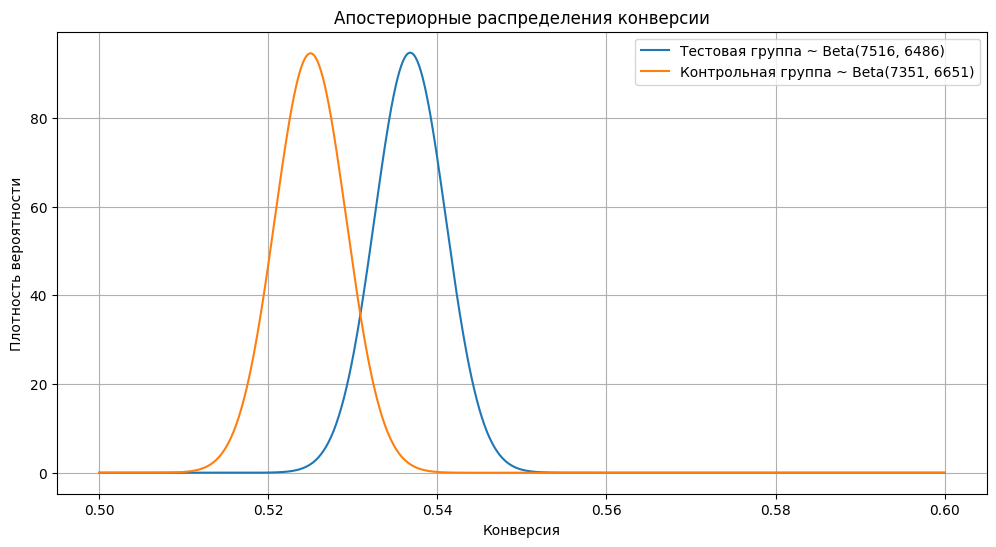

Вероятность что тестовая группа лучше: 97.54%
Средний относительный прирост: 2.26%
95% доверительный интервал прироста: [0.01%, 4.52%]


In [33]:
visual(A=test_sum1, B=control_sum1)

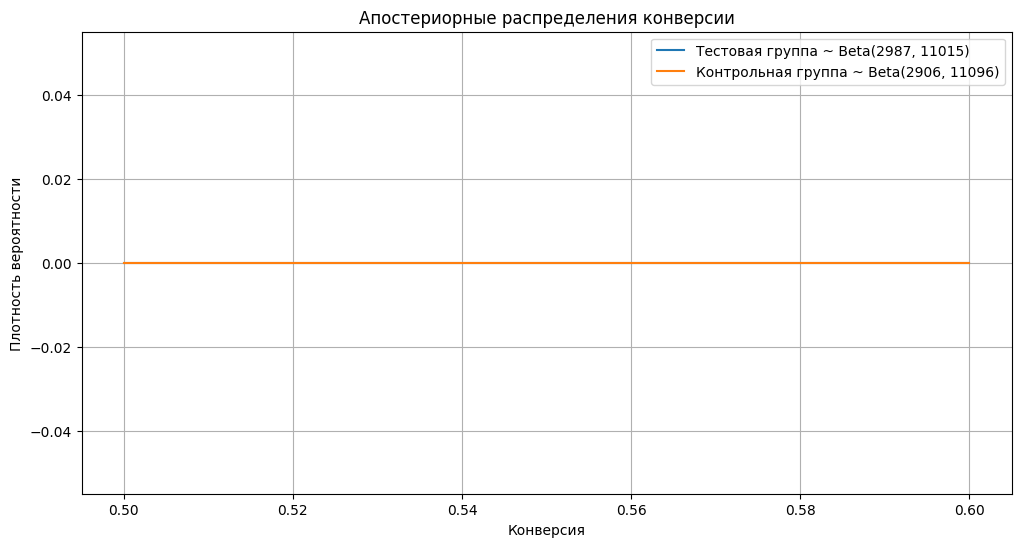

Вероятность что тестовая группа лучше: 88.38%
Средний относительный прирост: 2.83%
95% доверительный интервал прироста: [-1.78%, 7.59%]


In [32]:
visual(A=test_sum2, B=control_sum2)

# Заключение 1:

Результаты анализа показали, что для первого показателя (CR1) изменения, внесенные в тестовой группе, привели к статистически значимому эффекту. Это означает, что наблюдаемые различия между тестовой и контрольной группами не являются случайными и, вероятно, обусловлены внесенными изменениями.

Для второго показателя (CR2) результаты также указывают на положительное влияние изменений, однако степень статистической значимости этого влияния несколько ниже. Это означает, что хотя наблюдается положительная тенденция, уверенность в том, что эти различия не случайны, низкие.



# **Задание 2**

Был проведен эксперимент: изменение заголовка на кнопке на главном экране подписной страницы. Сделан акцент на выгоде пользователя.

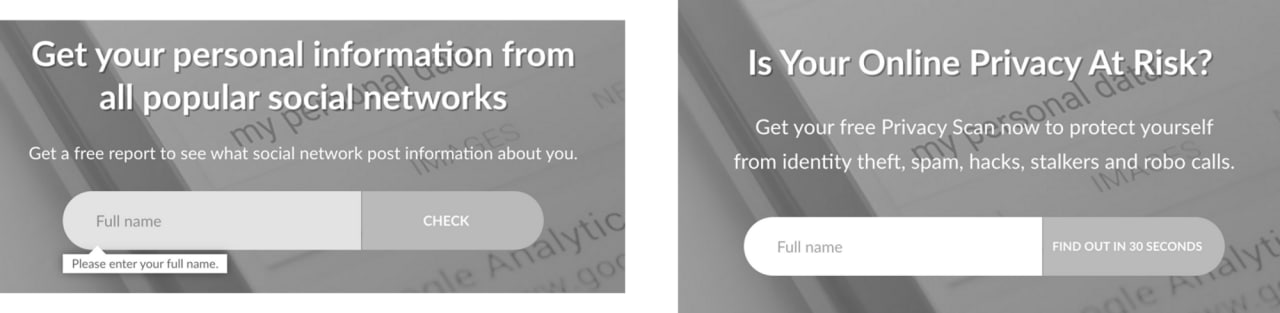

Описание полей:
- `date` – Дата
- `deviceCategory` – Тип устройства
- `sourceMedium` – Источник и канал привлечения
- `experimentVariant` – Группа (варианта) эксперимента: 0 - контроль, 1 - тест
- `clickButtonOnMain` – Кликнул/не кликнул по кнопке на главной странице в рамках сеанса (1 – кликнул, или 0 – не кликнул)
- `sessionDuration` – Время проведенное на сайте в рамках сеанса


## 2. Дизайн A/B теста

    # Целевые метрики:

          CTR (Click-Through Rate)
          ASD(Average Session Duration)


    # Статистический критерий:

          Для clickButtonOnMain подойдет Хи - квадрат, так как значение бинарное
          Для Session Duration подойдет t-тест Стьюдента, так как мы сравниваем средние значения двух групп.

    # Сегментация целевой аудитории:

          Устройства (deviceCategory): Разделить пользователей на мобильные устройства и другие устройства.
          Это важно, так как новый функционал предназначен для мобильной версии сайта.
 
          Источник трафика (sourceMedium): Разделить пользователей по источникам трафика (например, органический поиск, реклама).
          Это позволит учесть различия в поведении пользователей из разных источников.

    # Целевой апплифт:

          Предположим, мы хотим зафиксировать увеличение CTR (с 4% до 4.4%).


In [41]:
df_button = pd.read_csv('AB_ab_2_1.csv')

In [44]:
df_button.head()

,userId,date,deviceCategory,sourceMedium,experimentVariant,clickButtonOnMain,sessionDuration
0,1,2019-11-27,desktop,(direct) / (none),0,1,"123,109765"
1,2,2019-11-27,mobile,maz.com / referral,1,1,"135,6040006"
2,3,2019-11-27,mobile,(direct) / (none),1,1,"134,4510166"
3,4,2019-11-27,desktop,google / organic,1,1,"130,6910866"
4,5,2019-11-27,mobile,google / organic,0,1,"117,6173112"


In [65]:
df_button.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   userId             2943 non-null   int64 
 1   date               2943 non-null   object
 2   deviceCategory     2943 non-null   object
 3   sourceMedium       2943 non-null   object
 4   experimentVariant  2943 non-null   int64 
 5   clickButtonOnMain  2943 non-null   int64 
 6   sessionDuration    2943 non-null   object
dtypes: int64(3), object(4)
memory usage: 161.1+ KB


In [71]:
df_button['sessionDuration'] = df_button['sessionDuration'].str.replace(',', '.')
df_button['sessionDuration'] = pd.to_numeric(df_button['sessionDuration'])

In [77]:
df_button_test = df_button[df_button['experimentVariant'] == 1]
df_button_control = df_button[df_button['experimentVariant'] == 0]


In [52]:

bcontrol_count = df_button_control['userId'].count()
btest_count = df_button_test['userId'].count()
print(f'Количество тестовой группы: {btest_count}\nКоличество контрольной группы: {bcontrol_count}')

Количество тестовой группы: 1458
Количество контрольной группы: 1485


Уникальность пользовотелей

In [57]:
df_button['userId'].unique().shape

(2943,)

Рассчитаем метрику CTR (Click-Through Rate)

In [60]:
CTR_t = df_button_test['clickButtonOnMain'].sum() / df_button_test['clickButtonOnMain'].count() * 100
CTR_c = df_button_control['clickButtonOnMain'].sum() / df_button_control['clickButtonOnMain'].count() * 100
print(f'CTR для тестовой группы состовляет: {round(CTR_t,2)}%')
print(f'CTR для контрольной группы состовляет: {round(CTR_c,2)}%')
print(f'Разница: {round(CTR_t - CTR_c,2)}%')


CTR для тестовой группы состовляет: 9.12%
CTR для контрольной группы состовляет: 12.93%
Разница: -3.81%


Видим что CTR упало почти на 4%

Посмотрим эту же метрики для подгруппы для разных категории устройств

In [48]:
df_button['deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [84]:
df_button_test_m = df_button_test[df_button_test['deviceCategory']== 'mobile']
df_button_test_d = df_button_test[df_button_test['deviceCategory']== 'desktop']
df_button_test_t = df_button_test[df_button_test['deviceCategory']== 'tablet']
df_button_control_m = df_button_control[df_button_control['deviceCategory']== 'mobile']
df_button_control_d = df_button_control[df_button_control['deviceCategory']== 'desktop']
df_button_control_t = df_button_control[df_button_control['deviceCategory']== 'tablet']

In [51]:
# Создаем словарь для DataFrame test
test_dataframes = {
    'm': df_button_test_m,
    'd': df_button_test_d,
    't': df_button_test_t
}

# Создаем словарь для DataFrame control
control_dataframes = {
    'm': df_button_control_m,
    'd': df_button_control_d,
    't': df_button_control_t
}

for i in 'mdt':
    count_test = test_dataframes[i]['userId'].count()
    count_control = control_dataframes[i]['userId'].count()
    print(f'Количество пользователей в группе df_button_test_{i} равно: {count_test}')
    print(f'Количество пользователей в группе df_button_control_{i} равно: {count_control}')

Количество пользователей в группе df_button_test_m равно: 885
Количество пользователей в группе df_button_control_m равно: 857
Количество пользователей в группе df_button_test_d равно: 507
Количество пользователей в группе df_button_control_d равно: 562
Количество пользователей в группе df_button_test_t равно: 66
Количество пользователей в группе df_button_control_t равно: 66


In [85]:
test_dataframes = {
    'm': df_button_test_m,
    'd': df_button_test_d,
    't': df_button_test_t
}

control_dataframes = {
    'm': df_button_control_m,
    'd': df_button_control_d,
    't': df_button_control_t
}

# Функция для расчета CTR
def calculate_ctr(df):
    return df['clickButtonOnMain'].sum() / df['clickButtonOnMain'].count() * 100

for category in 'mdt':
    test_ctr = calculate_ctr(test_dataframes[category])
    control_ctr = calculate_ctr(control_dataframes[category])
    difference = test_ctr - control_ctr

    print(f'CTR_{category} для тестовой группы составляет: {round(test_ctr, 2)}%')
    print(f'CTR_{category} для контрольной группы составляет: {round(control_ctr, 2)}%')
    print(f'Разница {category.upper()}: {round(difference, 2)}%')

CTR_m для тестовой группы составляет: 8.25%
CTR_m для контрольной группы составляет: 12.95%
Разница M: -4.7%
CTR_d для тестовой группы составляет: 10.06%
CTR_d для контрольной группы составляет: 12.28%
Разница D: -2.22%
CTR_t для тестовой группы составляет: 13.64%
CTR_t для контрольной группы составляет: 18.18%
Разница T: -4.55%


И тут видно что метрика CTR для всех категории устройств упало, а что на счет метрики среднее время сеанса ASD(Average Session Duration)

In [79]:
ASD_t = df_button_test['sessionDuration'].sum() / df_button_test['sessionDuration'].count()
ASD_c = df_button_control['sessionDuration'].sum() / df_button_control['sessionDuration'].count()

print(f'ASD для тестовой группы состовляет: {round(ASD_t,2)}')
print(f'ASD для контрольной группы состовляет: {round(ASD_c,2)}')
print(f'Разница: {round(ASD_t - ASD_c,2)}')

ASD для тестовой группы состовляет: 133.06
ASD для контрольной группы состовляет: 120.04
Разница: 13.02


А тут мы видим рост метрики ASD

In [86]:
# Функция для расчета ASD (Average Session Duration)
def calculate_asd(data):
    return data['sessionDuration'].mean()

for category in 'mdt':
    test_asd = calculate_asd(test_dataframes[category])
    control_asd = calculate_asd(control_dataframes[category])
    difference = test_asd - control_asd

    print(f'ASD_{category} для тестовой группы составляет: {round(test_asd, 2)} секунд')
    print(f'ASD_{category} для контрольной группы составляет: {round(control_asd, 2)} секунд')
    print(f'Разница {category.upper()}: {round(difference, 2)} секунд')

ASD_m для тестовой группы составляет: 132.89 секунд
ASD_m для контрольной группы составляет: 120.22 секунд
Разница M: 12.67 секунд
ASD_d для тестовой группы составляет: 133.41 секунд
ASD_d для контрольной группы составляет: 119.85 секунд
Разница D: 13.56 секунд
ASD_t для тестовой группы составляет: 132.62 секунд
ASD_t для контрольной группы составляет: 119.31 секунд
Разница T: 13.31 секунд


И по всем категориям показатель ASD увеличился

# Теперь посчитаем статическую значимость этих метрик.

Как расспределены наши данные?

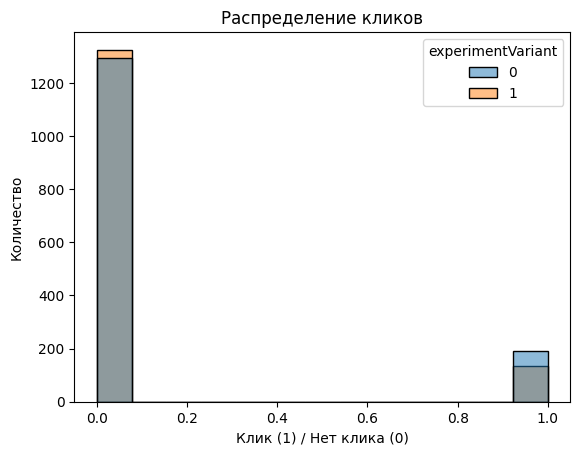

In [99]:
sns.histplot(data=df_button, x='clickButtonOnMain', hue='experimentVariant')
plt.title('Распределение кликов')
plt.xlabel('Клик (1) / Нет клика (0)')
plt.ylabel('Количество')
plt.show()

Так как данные у нас бинарные, используем Хи-квадрат тест

In [90]:
from scipy.stats import chi2_contingency
# 1. Хи-квадрат тест
contingency_table = pd.crosstab(
    [0] * len(df_button_test) + [1] * len(df_button_control),  # Группы (0 - test, 1 - control)
    pd.concat([df_button_test['clickButtonOnMain'],df_button_control['clickButtonOnMain']])
)
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Хи-квадрат тест: chi2 = {round(chi2,2)}, p-value = {p}")



Хи-квадрат тест: chi2 = 10.471018235774935, p-value = 0.001212618637697398


# Вывод:
Так как P-значение меньше 0.05, мы можем отвергнуть нулевую гипотезу о том, что различия случайны.

И принять альтернативную гипотезу о том, что различия между группами статистически значимы.

Это говорит о том, что изменение, внесенное в тестовой группе, оказало влияние на кликабельность кнопки.

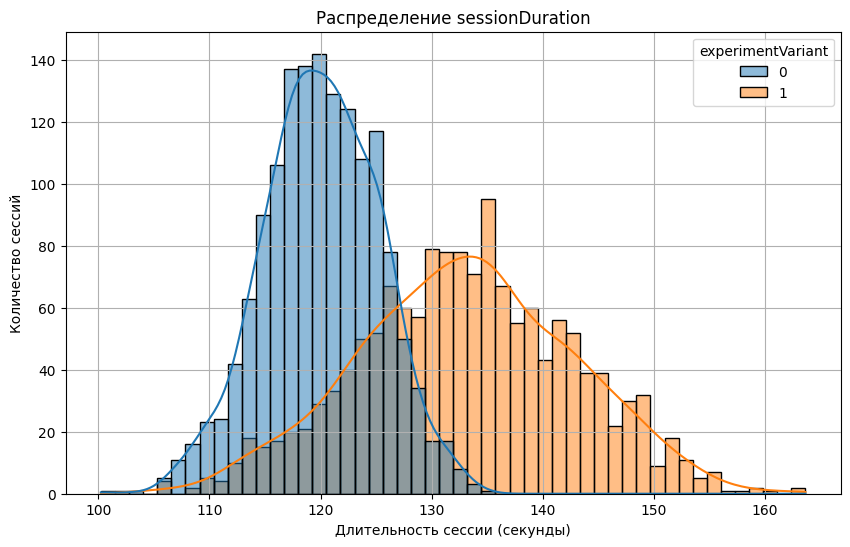

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_button, x='sessionDuration', hue='experimentVariant', bins=50, kde=True)  # kde=True для кривой плотности
plt.title('Распределение sessionDuration')
plt.xlabel('Длительность сессии (секунды)')
plt.ylabel('Количество сессий')
plt.grid(True)
plt.show()

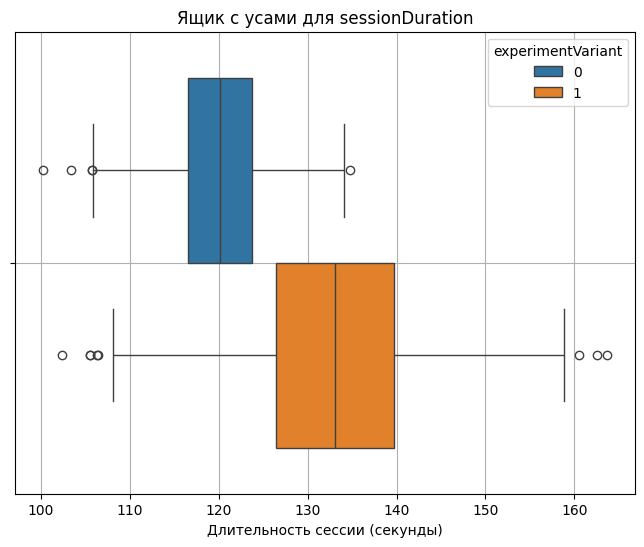

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_button, x='sessionDuration', hue='experimentVariant')
plt.title('Ящик с усами для sessionDuration')
plt.xlabel('Длительность сессии (секунды)')
plt.grid(True)
plt.show()

# Обработка выбросов, поскольку они могут исказить результаты и повлиять на выводы.

In [101]:
# Рассчитываем медиану test
median_duration_t = df_button_test['sessionDuration'].median()

# Определяем выбросы test (например, значения, находящиеся за пределами 1.5 * IQR)
Q1_t = df_button_test['sessionDuration'].quantile(0.25)
Q3_t = df_button_test['sessionDuration'].quantile(0.75)
IQR_t = Q3_t - Q1_t
lower_bound_t = Q1_t - 1.5 * IQR_t
upper_bound_t = Q3_t + 1.5 * IQR_t

# Заменяем выбросы на медиану test
df_button_test.loc[df_button_test['sessionDuration'] < lower_bound_t, 'sessionDuration'] = median_duration_t
df_button_test.loc[df_button_test['sessionDuration'] > upper_bound_t, 'sessionDuration'] = median_duration_t

In [109]:
# Рассчитываем медиану
median_duration_c = df_button_control['sessionDuration'].median()

# Определяем выбросы (например, значения, находящиеся за пределами 1.5 * IQR)
Q1_c = df_button_control['sessionDuration'].quantile(0.25)
Q3_c = df_button_control['sessionDuration'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c

# Заменяем выбросы на медиану
df_button_control.loc[df_button_control['sessionDuration'] < lower_bound_c, 'sessionDuration'] = median_duration_c
df_button_control.loc[df_button_control['sessionDuration'] > upper_bound_c, 'sessionDuration'] = median_duration_c

Text(0.5, 1.0, 'Control')

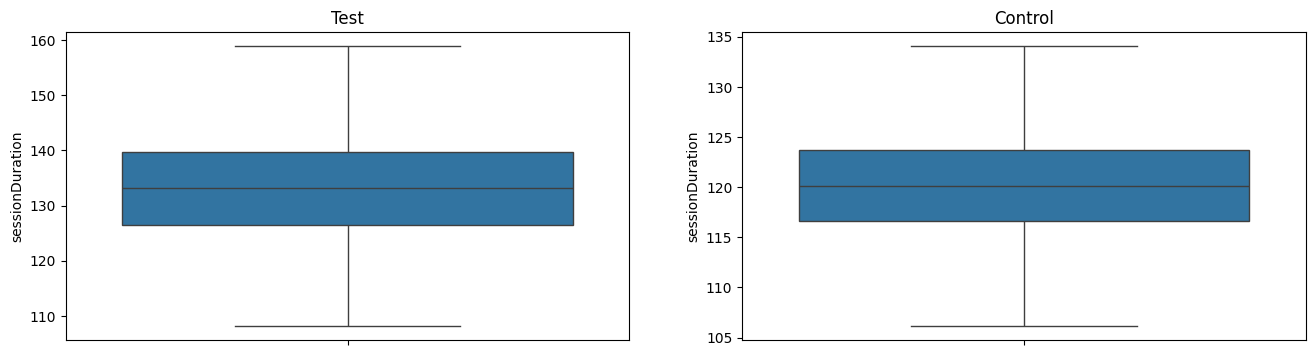

In [110]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(df_button_test['sessionDuration'], ax=axes[0])
axes[0].set_title('Test')
sns.boxplot(df_button_control['sessionDuration'], ax=axes[1])
axes[1].set_title('Control')


Text(0.5, 1.0, 'Control')

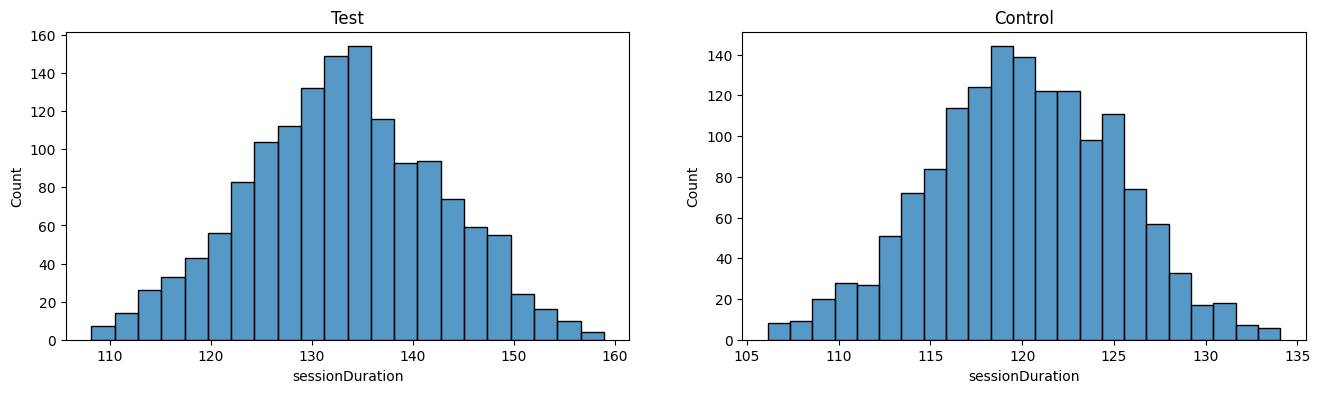

In [111]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.histplot(df_button_test['sessionDuration'], ax=axes[0])
axes[0].set_title('Test')
sns.histplot(df_button_control['sessionDuration'], ax=axes[1])
axes[1].set_title('Control')

Данные нормально распределены, но гомогенность нарушена, мы не можем использовать t-test в таком случай. Для такоих данных хорошо подходит тест Уэлча

# Тест Уэлча

In [118]:
from scipy.stats import ttest_ind

# Выполняем тест Уэлча (equal_var=False)
stat, p = ttest_ind(df_button_control['sessionDuration'], df_button_test['sessionDuration'], equal_var=False)

print(f"Тест Уэлча: статистика = {round(stat,2)}, p-значение = {p}")

Тест Уэлча: статистика = -46.33, p-значение = 0.0


# Заключение:

Статистический анализ показал, что изменения в экспериментальной группе оказали значимое влияние на поведение пользователей.

Хи-квадрат тест выявил статистически значимые различия в кликабельности кнопки между контрольной и экспериментальной группами, что указывает на изменение взаимодействия пользователей.

Тест Уэлча подтвердил значительные различия в средней продолжительности сессий между группами. Распределение продолжительности сессий в экспериментальной группе заметно отличается от контрольной, что свидетельствует о существенном изменении поведения пользователей.

Таким образом, результаты указывают на то, что изменения в экспериментальной группе привели к значимым изменениям как в кликабельности, так и в продолжительности сессий.